# Stable diffusion walker

Notebook for generating sequences of images and rendering a video

To run:
(see e.g. https://rentry.org/SDInstallGuide for reference)
* Clone basu jindal's [optimized stable diffusion](https://github.com/basujindal/stable-diffusion) repo, e.g. run ``git clone https://github.com/basujindal/stable-diffusion`` in empty folder, or download and unzip
* Create and activate conda environment
* Get the model weights (see below)
* Copy this notebook and txt2img_generator.py to the /optimzedSD/ subfolder.

Get model weights (~4GB):
* https://huggingface.co/CompVis/stable-diffusion-v-1-4-original/blob/main/sd-v1-4.ckpt
* paste to (your SD root folder)/models/ldm/stable-diffusion-v1/
* rename the model to model.ckpt

In [1]:
from txt2img_generator import *
import csv

c:\Users\y_w_u\anaconda3\envs\ldm\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading model from ../models/ldm/stable-diffusion-v1/model.ckpt
Global Step: 470000
UNet: Running in eps-prediction mode
CondStage: Running in eps-prediction mode
FirstStage: Running in eps-prediction mode
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels


You'll need a sequence of prompt modifiers to walk through in the form of a python list.

For example, here I use different eras in history. You can copy the eras_v3.csv file to the appropriate folder if you want to use it.

In [2]:
# read a csv to a python list (../ reads from the parent directory)
with open('../eras_v3.csv', 'r') as f:
    reader = csv.reader(f)
    seq = list(reader)

# This csv loads as a list of lists so use this comprehension to flatten it
seq = [i[0] for i in seq]

Generate a video from the list of prompt modifers using the ``sd_walk()`` function below.

SD walker uses a separate project name (distinct from prompt) to match the output folder and video name.

A folder of images will also be generated at ../{project_name}

Use the jupyter cell magic %%capture to avoid too much output being printed which can crash jupyter in vscode. 

In [ ]:
%%capture

def sd_walk(prompt, seq, project_name):
    sequence_gen(prompt, seq, project_name)
    folder2video(project_name, seq)

# Pass a list of tuples with prompt and project name (sequence, seq, is defined earlier)
runs = [
    ("astronaut", "astronaut"),
    ("spaceship", "spaceship"),
    ("robot", "robot"),
]

# Run!
for i in runs:
    sd_walk(i[0], seq, i[1])


## Generate video from saved files

Load from folder of images:

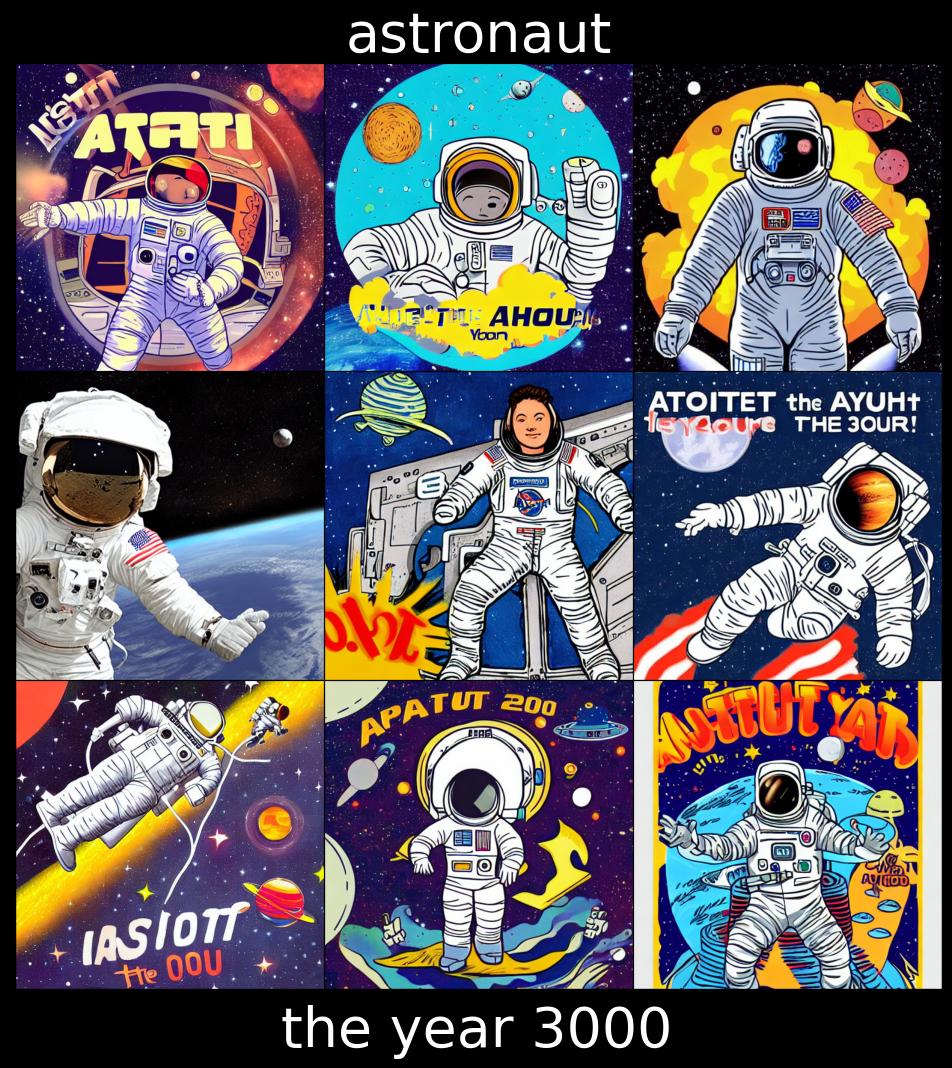

In [3]:
folder2video('astronaut', seq)

## Appendix
List of parameters that could be passed to sequence_gen():

In [ ]:
prompt # start of prompt
seq # list of prompt modifiers
project_name # name of project for folder, video
ddim_steps=50
batch_size=9
Width = 512
Height = 512
seed=12345
seed_step=10000